<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [22]:
#importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
#importar artists
artist = pd.read_table('data/artists.dat')
artist = artist[['id', 'name']]
artist.columns = ['userID', 'userName']
artist.head()

,userID,userName
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [14]:
#importar user_artists
user_artist = pd.read_table('data/user_artists.dat')
user_artist.columns = ['userID', 'artistID', 'nro_reproducciones']
user_artist.head()

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [24]:
#unir tablas
merged_df = pd.merge(artist, user_artist)
merged_df.head()

,userID,userName,artistID,nro_reproducciones
0,2,Diary of Dreams,51,13883
1,2,Diary of Dreams,52,11690
2,2,Diary of Dreams,53,11351
3,2,Diary of Dreams,54,10300
4,2,Diary of Dreams,55,8983


In [25]:
merged_df.shape

(92269, 4)

**Procedimiento:**
1. Importar las librerías `pandas` y `numpy`
2. En el dataframe `artist` se lee la data de artists, seleccionando las columnas `id` y `name`.
3. Se renombran las columnas seleccionadas de `artist` como `userID` y `userName`.
4. En el dataframe `user_artist` se lee la data de user_artists, seleccionando las columnas `userID`, `artistID` y `weight`.
5. Se renombra la columna `weight` como `nro_reproducciones` del dataframe `user_artist`.
6. Se usa la función de pandas `merge` para unir los dataframes creados anteriormente para obtener así el dataframe `merged_df`.

**Análisis y Conclusiones:**
* Se consolida el dataframe `merged_df` con un total de cuatro (4) columnas y 92269 filas.

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [26]:
merged_df[['userID', 'artistID']].nunique()

userID       1880
artistID    17568
dtype: int64

**Procedimiento:**
1. Aplicar un filtro a `merged_df` de las columnas `userID` y `artistID`.
2. Usar `nunique` para determinar los valores únicos de las columnas seleccionadas.

**Análisis y Conclusiones:**
* Se encuentran 1880 usuarios únicos y 17568 artistas únicos.


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [27]:
# Cálculo sin ponderar
resumen_artistas = merged_df.groupby('artistID')['nro_reproducciones'].agg(['sum', 'mean', 'count']).reset_index()
resumen_artistas['Prob_sin_ponderar'] = resumen_artistas['sum'] / resumen_artistas['sum'].sum()
resumen_artistas = resumen_artistas.sort_values(by='Prob_sin_ponderar', ascending=False)
resumen_artistas.head()

,artistID,sum,mean,count,Prob_sin_ponderar
283,289,2392326,4609.491329,519,0.034826
66,72,1301193,4630.580071,281,0.018942
83,89,1288851,2126.816832,606,0.018762
286,292,1057943,2612.204938,405,0.015401
61,67,918568,2151.213115,427,0.013372


In [19]:
# Cálculo ponderado
resumen_artistas['Prob_count'] = resumen_artistas['count'] / resumen_artistas['count'].sum()
resumen_artistas['Ponderado'] = resumen_artistas['sum'] * resumen_artistas['Prob_count']
resumen_artistas['Prob_ponderado'] = resumen_artistas['Ponderado'] / resumen_artistas['Ponderado'].sum()
resumen_artistas = resumen_artistas.sort_values(by='Prob_ponderado', ascending=False)
resumen_artistas.head()

,artistID,sum,mean,count,Prob_sin_ponderar,Prob_count,Ponderado,Prob_ponderado
283,289,2392326,4609.491329,519,0.034826,0.005625,13456.493449,0.121028
83,89,1288851,2126.816832,606,0.018762,0.006568,8464.855000,0.076133
282,288,902032,1879.233333,480,0.013131,0.005202,4692.533354,0.042205
286,292,1057943,2612.204938,405,0.015401,0.004389,4643.671385,0.041765
61,67,918568,2151.213115,427,0.013372,0.004628,4250.924319,0.038233


**Procedimiento:**
1. Usar un `groupby` para agrupar `nro_reproducciones` por la suma, media y recuento.
2. Calcular el promedio de la suma de reproducciones por artista, y su respectivo porcentaje de participación.
3. Ordenar esa participación de mayor a menor.
4. Calcular el peso del recuento de usuarios que escuchan cada artista sobre la suma del recuento.
5. Calcular el ponderado, el cual es la suma de reproducciones multiplicado por el peso calculado en el paso anterior, por cada artista.
6. Sobre el ponderado, obtener la participación y ordenar de mayor a menor.

**Análisis y Conclusiones:**
* Para el análisis de promedio sin ponderar y promedio ponderado se puede observar que un artista como el 289 se ubica en el primer lugar para ambos escenarios. Artistas como los 89, 292 y 67 se mantienen en los primeros puestos para ambos escenarios, pero un artista como el 72, aunque cuenta con 1.3 millones de reproducciones, no se muestra en el segundo escenario (promedio ponderado) dado que el peso del número de usuarios que lo escuchan implica que su ponderado sea castigado y no se muestre entre los cinco (5) primeros.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\jrami\AppData\Local\Temp\ipykernel_13824\2495445787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario_8['Reproducciones_relativas'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()


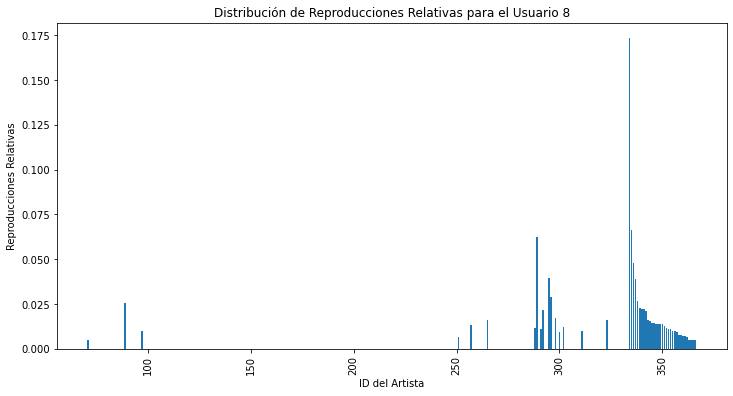

In [28]:
usuario_8 = merged_df[merged_df['userID'] == 8]

usuario_8['Reproducciones_relativas'] = usuario_8['nro_reproducciones'] / usuario_8['nro_reproducciones'].sum()

plt.figure(figsize=(12, 6))
plt.bar(usuario_8['artistID'], usuario_8['Reproducciones_relativas'])
plt.xlabel('ID del Artista')
plt.ylabel('Reproducciones Relativas')
plt.title('Distribución de Reproducciones Relativas para el Usuario 8')
plt.xticks(rotation=90)
plt.show()

In [21]:
usuario_8 = usuario_8.sort_values(by='Reproducciones_relativas', ascending=False)
usuario_8.head(11)

,userID,userName,artistID,nro_reproducciones,Reproducciones_relativas
317,8,DIR EN GREY,334,6291,0.173406
318,8,DIR EN GREY,335,2396,0.066044
307,8,DIR EN GREY,289,2258,0.062240
319,8,DIR EN GREY,336,1735,0.047824
310,8,DIR EN GREY,295,1425,0.039279
320,8,DIR EN GREY,337,1407,0.038783
311,8,DIR EN GREY,296,1039,0.028639
321,8,DIR EN GREY,338,963,0.026544
301,8,DIR EN GREY,89,921,0.025387
322,8,DIR EN GREY,339,819,0.022575


**Procedimiento:**
1. Crear un dataframe para filtrar las reproducciones del usuario 8.
2. Crear la columna `Reproducciones_relativas` la cual se calcula como las reproducciones por artista dividido el total de reproducciones del usuario 8.
3. Graficar las reproducciones relativas con matplotlib.
4. Ordenar el dataframe del usuario 8 por Reproducciones relativas y obtener el top 11.

**Análisis y Conclusiones:**
* De acuerdo a la gráfica se puede observar que hay un grupo condensado entre los artistas 334 hasta 340 con niveles de reproducción altos. Entre el top 10 también se encuentran los artistas 289, 295 y 296.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [39]:
# Utilice este espacio para escribir el código.
# Importamos la función train_test_split 
from sklearn.model_selection import train_test_split

db = merged_df

r_matrix = db.pivot_table(values='nro_reproducciones', aggfunc='count', index='userID', columns='artistID')

r_matrix.shape

X = merged_df.copy()
y = merged_df['userID']

# Partimos la base en entrenamiento y prueba estratificando por usuario
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Importamos la función mean_squared_error
from sklearn.metrics import mean_squared_error

# Creamos una funcion que calcula la raíz del error cuadrático medio (RMSE)
def rmse(y_true, y_pred):
       return np.sqrt(mean_squared_error(y_true, y_pred))

def cf_user_mean(userID, artistID):
    
    # Primero verificamos si el artista está en la matriz
    if artistID in r_matrix:
        # Si esta calculamos la media de los reproducciones
        mean_listeners = r_matrix[artistID].mean()
    
    else:
        # Si no lo está, asignamos el valor promedio general 
        mean_listeners = r_matrix.mean()
    
    return mean_listeners


def rmse_recom(cf_model):
    # Construimos una lista con las tuplas usuario-película en la base de entrenamiento
    id_pairs = zip(X_test['userID'], X_test['artistID'])
    # Predecimos el rating para cada tupla usuario-película
    y_pred = np.array([cf_model(user, artist) for (user, artist) in
   id_pairs])
    # Extraemos las reproducciones que dieron los usuarios en la base de prueba
    y_true = np.array(X_test['nro_reproducciones'])
    # Retornamos el RMSE
    return rmse(y_true, y_pred)

rmse_recom(cf_user_mean)



3798.759175609327

In [40]:
## Para obtener las recomendaciones

# Se crea la matriz

r_matrix = merged_df.pivot_table(values='nro_reproducciones', index='userID', columns='artistID')

## Obtener la lista de todos los artistas
all_artists = r_matrix.columns

# Almacenarlo
results = []

# Calcular los puntajes de similitud para todos los artistas y el usuario 8
for artistID in all_artists:
    # Verificar si el usuario ya ha escuchado a este artista
    if pd.notna(r_matrix.loc[8, artistID]):
        continue

    # Obtener el puntaje calculado usando cf_user_wmean
    score = cf_user_mean(8, artistID)

    # Agregar el resultado a la lista de resultados
    results.append((artistID, score))

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results, columns=['artistID', 'score'])

# Ordenar el DataFrame por puntaje en orden descendente
results_df = results_df.sort_values(by='score', ascending=False)

# Tomar los 10 primeros resultados como recomendaciones para el usuario 8
top_10_recommendations = results_df.head(10)

# Mostrar las recomendaciones
print("Las 10 mejores recomendaciones de artistas para el usuario 8 son:")
for i, row in top_10_recommendations.iterrows():
    print(f"{i + 1}. Artista ID: {row['artistID']}, Puntuación: {row['score']}")

Las 10 mejores recomendaciones de artistas para el usuario 8 son:
8115. Artista ID: 8388.0, Puntuación: 35323.0
6161. Artista ID: 6373.0, Puntuación: 30614.0
16980. Artista ID: 18121.0, Puntuación: 23462.0
8035. Artista ID: 8308.0, Puntuación: 16497.5
14192. Artista ID: 14986.0, Puntuación: 15345.0
14193. Artista ID: 14987.0, Puntuación: 14082.0
715. Artista ID: 792.0, Puntuación: 13462.884615384615
14281. Artista ID: 15075.0, Puntuación: 12520.0
4451. Artista ID: 4625.0, Puntuación: 10776.0
16981. Artista ID: 18122.0, Puntuación: 10726.0


**Procedimiento:**
1. Se construye una nueva columna para cada artista, donde se calcula la cantidad promedio de usuarios que escuchan a cada artista.
2. Este cálculo se reordena de forma descendente de acuerdo al promedio del conteo de usuarios.
3. Se reporta el top 10 de artistas con promedios superiores de usuarios que los escuchan.  

**Análisis y Conclusiones:**
1. Este método de recomendación hace recomendaciones genéricas para cualquier usuario. No considera información del usuario "número 8" para hacer una recomendación personalizada. Hace recomendaciones para el público en general.

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [12]:
db = merged_df

r_matrix = db.pivot_table(values='nro_reproducciones', index='userID', columns='artistID')

r_matrix.shape

X = merged_df.copy()
y = merged_df['userID']

# Partimos la base en entrenamiento y prueba estratificando por usuario
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


def cf_user_wmean1(userID, artistID):
    
    # Primero verificamos si el artista está en la matriz
    if artistID in r_matrix:
        # Si esta calculamos la media de los reproducciones
        mean_rep = r_matrix[artistID].mean()
    
    else:
        # Si no lo está, asignamos el valor promedio general 
        mean_rep = r_matrix.mean()
    
    return mean_rep

for artistID in all_artists:
    # Verificar si el usuario ya ha escuchado a este artista
    if pd.notna(r_matrix.loc[8, artistID]):
        continue

    # Obtener el puntaje calculado usando cf_user_wmean
    score = cf_user_wmean1(8, artistID)

    # Agregar el resultado a la lista de resultados
    results.append((artistID, score))

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results, columns=['artistID', 'score'])

# Ordenar el DataFrame por puntaje en orden descendente
results_df = results_df.sort_values(by='score', ascending=False)

# Tomar los 10 primeros resultados como recomendaciones para el usuario 8
top_10_recommendations = results_df.head(10)

# Mostrar las recomendaciones
print("Las 10 mejores recomendaciones de artistas para el usuario 8 son:")
for i, row in top_10_recommendations.iterrows():
    print(f"{i + 1}. Artista ID: {row['artistID']}, Puntuación: {row['score']}")

**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [13]:
# Utilice este espacio para escribir el código.

# Se crea la matriz

r_matrix = merged_df.pivot_table(values='nro_reproducciones', index='userID', columns='artistID')


# Rellenamos los faltantes con 0
r_matrix_dummy = r_matrix.copy().fillna(0)

# Importamos cosine_similarity 
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno 
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz resultante en un dataframe
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

## Creamos el modelo

def cf_user_wmean(userID, artistID):
    
    # Primero verificamos si la película esta en la matriz
    if artistID in r_matrix:
    
        #Buscamos las medidas de similitud con los otros usuarios
        sim_scores = cosine_sim[userID]
        
        
        # Obtenemos el nro. reproducciones no faltantes de la matriz bajo evaluación
        m_repr = r_matrix[artistID]
        
         # Obtenemos los índicies de los artistas sin reproducciones 
        idx = m_repr[m_repr.isnull()].index
        
        # Nos quedamos con similitudes y reproducciones completos
        sim_scores = sim_scores.drop(idx)
        m_repr = m_repr.dropna()
        
        # Calculamos la media ponderada
        wmean_repr = np.dot(sim_scores, m_repr)/ sim_scores.sum()
           
    else:
        # Si no tenemos ninguna información retornamos 3
        wmean_repr = 3.0
    
    return wmean_repr

In [14]:
## Para obtener las recomendaciones

## Obtener la lista de todos los artistas
all_artists = r_matrix.columns

# Almacenarlo
results = []

# Calcular los puntajes de similitud para todos los artistas y el usuario 8
for artistID in all_artists:
    # Verificar si el usuario ya ha escuchado a este artista
    if pd.notna(r_matrix.loc[8, artistID]):
        continue

    # Obtener el puntaje calculado usando cf_user_wmean
    score = cf_user_wmean(8, artistID)

    # Agregar el resultado a la lista de resultados
    results.append((artistID, score))

# Crear un DataFrame a partir de la lista de resultados
results_df = pd.DataFrame(results, columns=['artistID', 'score'])

# Ordenar el DataFrame por puntaje en orden descendente
results_df = results_df.sort_values(by='score', ascending=False)

# Tomar los 10 primeros resultados como recomendaciones para el usuario 8
top_10_recommendations = results_df.head(10)

# Mostrar las recomendaciones
print("Las 10 mejores recomendaciones de artistas para el usuario 8 son:")
for i, row in top_10_recommendations.iterrows():
    print(f"{i + 1}. Artista ID: {row['artistID']}, Puntuación: {row['score']}")

C:\Users\jrami\AppData\Local\Temp\ipykernel_21136\460652846.py:42: RuntimeWarning: invalid value encountered in double_scalars
  wmean_repr = np.dot(sim_scores, m_repr)/ sim_scores.sum()


Las 10 mejores recomendaciones de artistas para el usuario 8 son:
8035. Artista ID: 8308.0, Puntuación: 32990.0
6161. Artista ID: 6373.0, Puntuación: 30614.0
16980. Artista ID: 18121.0, Puntuación: 23462.0
1452. Artista ID: 1541.0, Puntuación: 17097.666227356825
1106. Artista ID: 1191.0, Puntuación: 13330.75474095746
2552. Artista ID: 2652.0, Puntuación: 12754.274950029021
9050. Artista ID: 9363.0, Puntuación: 12091.0
16981. Artista ID: 18122.0, Puntuación: 10726.0
8093. Artista ID: 8366.0, Puntuación: 10574.0
8008. Artista ID: 8281.0, Puntuación: 9615.0


**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [15]:
# Utilice este espacio para escribir el código.

A_df = merged_df.pivot_table(values='nro_reproducciones', index='userID', columns='artistID').fillna(0)

A = A_df.to_numpy()
user_ratings_mean = np.mean(A, axis = 1)
A_demeaned = A - user_ratings_mean.reshape(-1, 1)



In [16]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(A_demeaned, k = 50)

In [17]:
sigma = np.diag(sigma)

A_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [18]:
recomendac_df = pd.DataFrame(A_recomendaciones, columns = r_matrix.columns)
recomendac_df.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
0,3.679973,6.076347,3.823610,3.909862,3.805242,0.583949,108.181440,3.286411,2.263807,4.054306,...,3.985920,3.931924,3.906195,3.901286,3.891300,3.888084,3.886899,3.885714,3.885545,4.024320
1,1.183948,1.186305,1.183846,1.183535,1.185027,1.175249,0.517765,1.146765,1.179343,1.192704,...,1.184350,1.184160,1.184070,1.184053,1.184018,1.184006,1.184002,1.183998,1.183998,1.184733
2,0.902201,0.921129,0.712258,0.721052,0.801466,0.820246,17.155344,0.815175,3.402240,1.668218,...,0.732216,0.725110,0.721724,0.721078,0.719764,0.719341,0.719185,0.719029,0.719006,0.881489
3,0.131234,0.404335,0.114802,0.141407,0.275553,0.652459,15.666567,0.288979,4.041828,2.467634,...,0.144319,0.133540,0.128404,0.127424,0.125430,0.124788,0.124552,0.124315,0.124281,0.464630
4,0.049619,0.046060,0.049196,0.049389,0.049030,0.047128,0.113929,0.048449,0.042154,0.045567,...,0.048977,0.049068,0.049112,0.049120,0.049137,0.049142,0.049144,0.049146,0.049147,0.048816


**Procedimiento:**

**Análisis y Conclusiones:**

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [19]:
# Utilice este espacio para escribir el código.

## Se trae la librería de Apriori
from apyori import apriori

## Se pasa la información del dataframe
records = []
for i in merged_df['userID'].unique():
    records.append(list(merged_df[merged_df['userID'] == i]['artistID'].values))

ModuleNotFoundError: No module named 'apyori'

In [ ]:
## Se realiza una verificación rápida
records[7]

[8,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415]

In [ ]:
## Se cargan las reglas de asociación con base en la información de analisis descriptivo y un max_lenght de 2

association_rules = apriori(records, min_support=0.01, min_confidence=0.5, min_lift=8,max_length=2)
association_results = list(association_rules)

In [ ]:
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 196 reglas de asociación.


In [ ]:
## Se hace un listado de las reglas Obtenidas

for rule in association_results:


    #Regla Antecedente -> Consecuente
    print("Regla: " +str(set(rule[2][0].items_base)) + " -> " + str(set(rule[2][0].items_add)))

    #Segundo índice de la lista interna
    print("Soporte: " + str( rule[1]))

    #Tercer índice de la lista ubicada en 0th
    #del tercer índice de la lista interna

    print("Confianza: " + str( rule[2][0][2]))
    print("Lift: " + str(rule[2][0][3]))
    print("=====================================")

Regla: {98} -> {51}
Soporte: 0.010106382978723405
Confianza: 0.8636363636363638
Lift: 14.627354627354629
Regla: {99} -> {51}
Soporte: 0.015957446808510637
Confianza: 0.6122448979591837
Lift: 10.369553226696084
Regla: {193} -> {51}
Soporte: 0.019148936170212766
Confianza: 0.6923076923076924
Lift: 11.725571725571728
Regla: {877} -> {51}
Soporte: 0.010106382978723405
Confianza: 0.6129032258064516
Lift: 10.38070328392909
Regla: {993} -> {51}
Soporte: 0.015425531914893617
Confianza: 0.8285714285714286
Lift: 14.033462033462033
Regla: {997} -> {51}
Soporte: 0.018085106382978722
Confianza: 0.7906976744186046
Lift: 13.3919966478106
Regla: {998} -> {51}
Soporte: 0.01648936170212766
Confianza: 0.7560975609756098
Lift: 12.805976708415733
Regla: {1001} -> {51}
Soporte: 0.026063829787234042
Confianza: 0.5268817204301075
Lift: 8.923762472149567
Regla: {1013} -> {51}
Soporte: 0.013297872340425532
Confianza: 0.78125
Lift: 13.231981981981981
Regla: {1014} -> {51}
Soporte: 0.017553191489361703
Confianza:

In [ ]:
## Para obtener las recomendaciones para el usuario 8 se procede a

## Obtener todas los items (artistID) que escucha el usuario 8 
user_id = 8
user_rules = [rule for rule in association_results if str(user_id) in str(rule.items)]

## Ordenar reglas por lift en orden descendente
user_rules.sort(key=lambda x: x[2][0][3], reverse=True)

# Tomar los 10 elementos consecuentes de las reglas con el lift más alto
top_10_recommendations = []
for rule in user_rules[:10]:
    antecedente = set(rule[2][0].items_base)
    consecuencia = set(rule[2][0].items_add)
    recomendaciones = consecuencia - {user_id}
    soporte = rule[1]
    confianza = rule[2][0][2]
    lift = rule[2][0][3]
    top_10_recommendations.append((antecedente, recomendaciones, soporte, confianza, lift))

# Imprimir las recomendaciones con regla, soporte y confianza
for i, (antecedente, recomendaciones, soporte, confianza, lift) in enumerate(top_10_recommendations, start=1):
    print(f"Recomendación {i}:")
    print(f"  Regla: {antecedente} -> {recomendaciones}")
    print(f"  Soporte: {soporte}")
    print(f"  Confianza: {confianza}")
    print(f"  Lift: {lift}")
    print("=====================================")

Recomendación 1:
  Regla: {1013} -> {998}
  Soporte: 0.010638297872340425
  Confianza: 0.625
  Lift: 28.65853658536585
Recomendación 2:
  Regla: {997} -> {998}
  Soporte: 0.013829787234042552
  Confianza: 0.6046511627906976
  Lift: 27.72546795235394
Recomendación 3:
  Regla: {993} -> {998}
  Soporte: 0.010106382978723405
  Confianza: 0.5428571428571429
  Lift: 24.891986062717773
Recomendación 4:
  Regla: {1364} -> {841}
  Soporte: 0.010106382978723405
  Confianza: 0.9500000000000001
  Lift: 22.049382716049383
Recomendación 5:
  Regla: {813} -> {815}
  Soporte: 0.011702127659574468
  Confianza: 0.5238095238095237
  Lift: 21.407867494824014
Recomendación 6:
  Regla: {1853} -> {779}
  Soporte: 0.013297872340425532
  Confianza: 0.78125
  Lift: 20.68661971830986
Recomendación 7:
  Regla: {1458} -> {797}
  Soporte: 0.011170212765957447
  Confianza: 0.5384615384615385
  Lift: 19.849170437405736
Recomendación 8:
  Regla: {208} -> {428}
  Soporte: 0.01276595744680851
  Confianza: 0.6
  Lift: 19

**Procedimiento:**

Para desarrollar el problema se procede a:

1. Cargar la librería de Apriori.
2. Transformar el dataframe en un listado para poder usarlo con la librería.
3. Cargar las reglas de asociación con base en el analisis descriptivo que se realizó.
4. Con base en esas reglas generar para el usuario 8 un top 10 de recomendaciones con base en el Lift que indica la probabilidad de que alguien escuche a otro artista con base en el primero.
5. Se imprime este resultado.

**Análisis y Conclusiones:**

Como se puede observar en el caso del usuario 8 con base en canasta se presenta la repetición del artista 998 que parece tener un alto lift con la musica que ya escucha el usuario esto quiere decir que existe una relación alta entre este artista y los que ya escucha el usuario indicando tal vez una similitud de genero o estilos que no se hace explicita en las variables.

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

**Análisis y Conclusiones:**
En el mundo ideal, la manera objetiva de revisar las recomondaciones sería a través de la data nueva de que artistas está efectivamente consumiendo posterior a este análisis. Bajo el set de datos que tenemos una manera de evaluar objetivamente las recomendaciones sería verificar como se comporta el algoritmo de recomendaciones para los artistas que sí consume nuestro usuario. 
